In [15]:
import pandas as pd
df = pd.read_csv("../data/version1.csv")

In [3]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


In [4]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns) #identifying categorical columns

Index(['Gender', 'Location', 'Education', 'Occupation', 'Primary_App',
       'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')


In [5]:
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 50) #checking unique values

Unique values in 'Gender':
['Non-binary' 'Female' 'Male']
--------------------------------------------------
Unique values in 'Location':
['Bangalore' 'Delhi' 'Kolkata' 'Mumbai' 'Chennai' 'Pune' 'Hyderabad']
--------------------------------------------------
Unique values in 'Education':
['Undergraduate' 'Graduate' 'Postgraduate']
--------------------------------------------------
Unique values in 'Occupation':
['Freelancer' 'Part-time Job' 'Intern' 'Full-time Job' 'Student']
--------------------------------------------------
Unique values in 'Primary_App':
['Hinge' nan 'OkCupid' 'Tinder' 'Bumble']
--------------------------------------------------
Unique values in 'Secondary_Apps':
['Hinge' 'OkCupid' nan 'Tinder' 'Bumble']
--------------------------------------------------
Unique values in 'Usage_Frequency':
['Monthly' 'Weekly' 'Daily']
--------------------------------------------------
Unique values in 'Daily_Usage_Time':
['1 hour' '30 minutes' '2 hours' '1.5 hours' '3 hours']
------

In [6]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip().str.lower()) #normalizing case and removing white space

In [7]:
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 50)

Value counts for 'Gender':
Gender
female        176
male          171
non-binary    153
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Location':
Location
mumbai       82
delhi        76
kolkata      76
bangalore    69
pune         67
chennai      66
hyderabad    64
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Education':
Education
graduate         169
undergraduate    166
postgraduate     165
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Occupation':
Occupation
student          106
intern           105
freelancer       103
full-time job    100
part-time job     86
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Primary_App':
Primary_App
okcupid    118
hinge      106
bumble      93
tinder      76
Name: count, dtype: int64
--------------------------------------------------
Value counts for 'Secon

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [9]:
print("Missing Values Per Column:")
print(df.isnull().sum()) #check missing values

Missing Values Per Column:
User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64


In [10]:
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True) #filling numerical columns with their median

In [11]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_59693/4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
df['missing_flag'] = df.isnull().sum(axis=1)

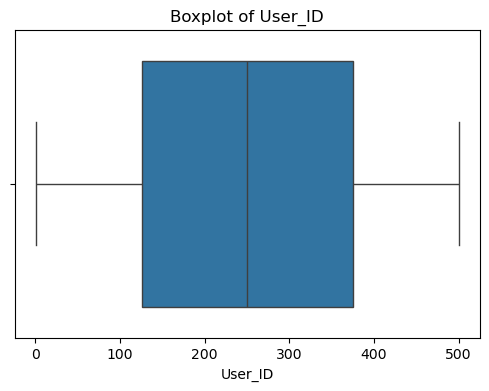

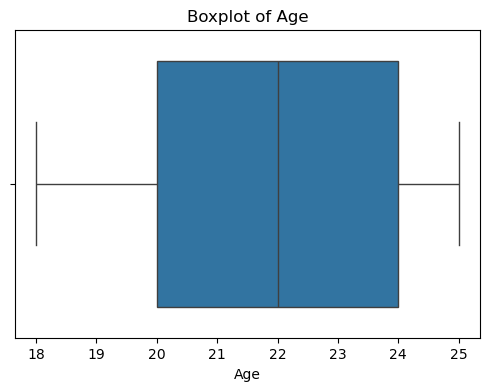

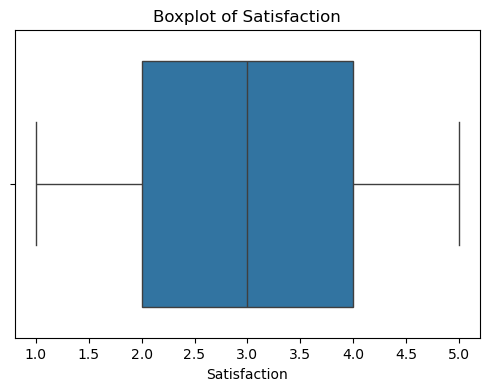

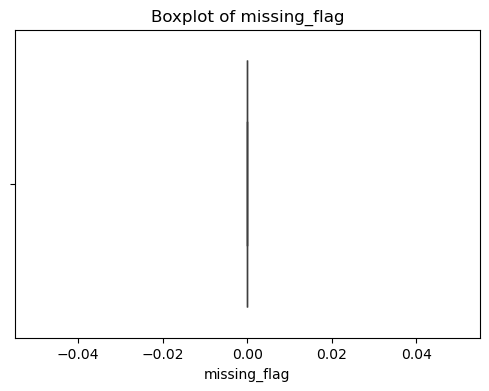

In [13]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show() #checking for outliers

In [14]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] #removing outliers

In [ ]:
import pandas as pd
import numpy as np

# Loading CSV file into a DataFrame
df = pd.read_csv("../data/version1.csv")  

# Selecting only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Computng the correlation matrix
corr_matrix = numerical_df.corr()
print(corr_matrix)

               User_ID       Age  Satisfaction
User_ID       1.000000  0.075403     -0.029616
Age           0.075403  1.000000     -0.018858
Satisfaction -0.029616 -0.018858      1.000000


In [ ]:
# Correlation Interpretation:
# - User_ID & Age: Weak positive correlation (0.075)
# - User_ID & Satisfaction: Weak negative correlation (-0.030)
# - Age & Satisfaction: Very weak negative correlation (-0.019)


In [6]:
print(df.columns)

Index(['User_ID', 'Age', 'Gender', 'Location', 'Education', 'Occupation',
       'Primary_App', 'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Satisfaction', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')


Primary_App  Bumble  Hinge  OkCupid  Tinder
Gender                                     
Female           39     35       39      23
Male             29     29       46      28
Non-binary       25     42       33      25


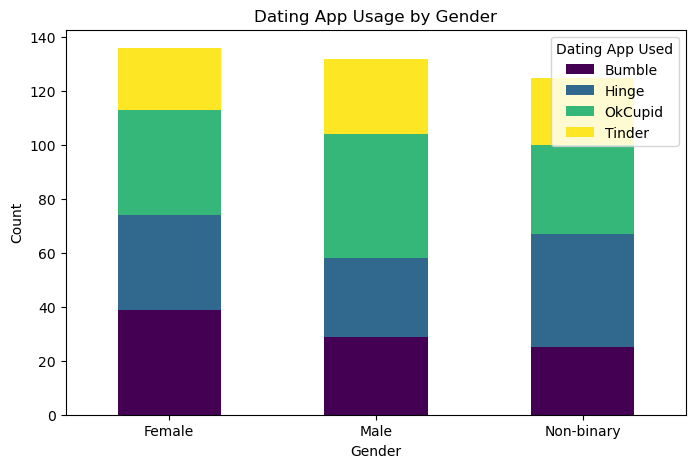

In [8]:
import matplotlib.pyplot as plt
# Count usage of dating apps by gender
gender_app_usage = df.groupby("Gender")["Primary_App"].value_counts().unstack()

# Display as a table
print(gender_app_usage)

# Visualize with a stacked bar chart
gender_app_usage.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Dating App Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Dating App Used")
plt.xticks(rotation=0)
plt.show()

In [9]:
import scipy.stats as stats
import numpy as np

# Define the contingency table (based on your data)
observed = np.array([
    [39, 35, 39, 23],  # Female
    [29, 29, 46, 28],  # Male
    [25, 42, 33, 25]   # Non-binary
])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Display results
print(f"Chi-square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Conclusion
if p < 0.05:
    print("Conclusion: Gender significantly influences dating app preferences (reject H0).")
else:
    print("Conclusion: No significant relationship between gender and dating app preferences (fail to reject H0).")

Chi-square Statistic: 7.9852
P-value: 0.2392
Degrees of Freedom: 6
Expected Frequencies:
 [[32.18320611 36.68193384 40.8346056  26.30025445]
 [31.23664122 35.60305344 39.63358779 25.52671756]
 [29.58015267 33.71501272 37.53180662 24.17302799]]
Conclusion: No significant relationship between gender and dating app preferences (fail to reject H0).


/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_60172/3497924194.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multiple_apps.index, y=multiple_apps.values, palette="Set2")


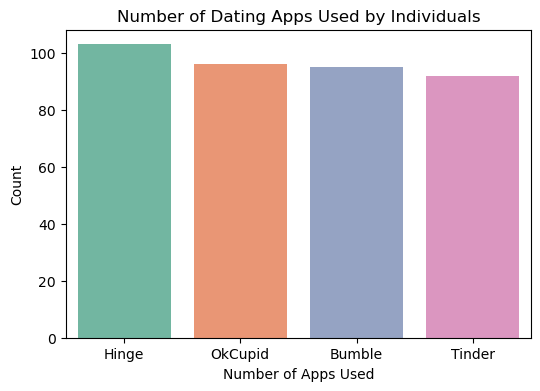

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
multiple_apps = df["Secondary_Apps"].value_counts()

# Plot distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=multiple_apps.index, y=multiple_apps.values, palette="Set2")
plt.title("Number of Dating Apps Used by Individuals")
plt.xlabel("Number of Apps Used")
plt.ylabel("Count")
plt.show()

/var/folders/y9/nz6wpx715yggg377x89r6b1h0000gn/T/ipykernel_60172/3031314955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_activity.index, y=age_activity.values, palette="muted")


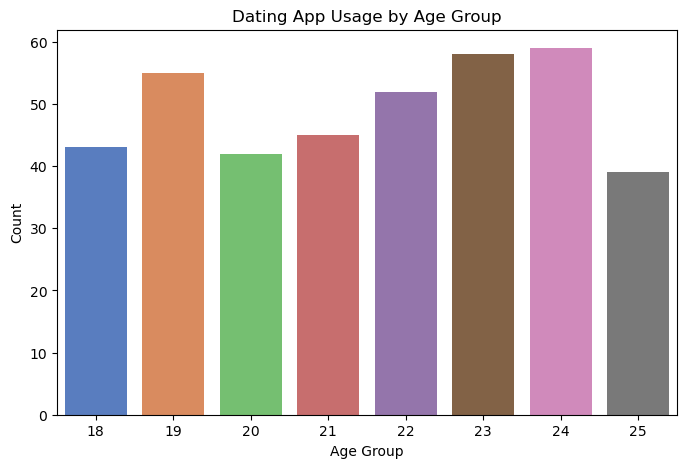

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count primary app usage by age group
age_activity = df.groupby("Age")["Primary_App"].count()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=age_activity.index, y=age_activity.values, palette="muted")
plt.title("Dating App Usage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [ ]:
#this shows that dating app usage is highest among the 24 year olds

Primary_App  Bumble  Hinge  OkCupid  Tinder
Location                                   
Bangalore        11     17       18       4
Chennai          11     14       19      10
Delhi            11     16       17      14
Hyderabad        15      8        9      15
Kolkata          20     17       19      10
Mumbai           12     16       23      16
Pune             13     18       13       7


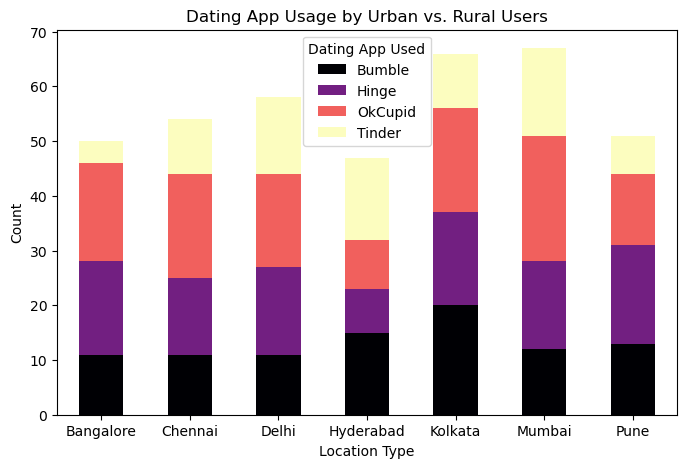

In [17]:
# Group by location type
location_usage = df.groupby("Location")["Primary_App"].value_counts().unstack()

# Display table
print(location_usage)

# Stacked bar chart
location_usage.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="magma")
plt.title("Dating App Usage by Urban vs. Rural Users")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.legend(title="Dating App Used")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Interpretation of dating app usage by city:
# Kolkata has the highest overall usage, especially on Bumble (20) and OkCupid (19).
# Mumbai shows the highest engagement on OkCupid (23).
# Hyderabad and Delhi have balanced usage across multiple apps.
# Tinder is most popular in Delhi (14) and Hyderabad (15), showing city-based preferences.